In [1]:
# A Confusion Matrix is a table that shows how well a classification model performs.
# It compares the model’s predictions with actual results.
# There are four parts:
# 1. True Positives (TP) (correct positive predictions)
# 2. True Negatives (TN) (correct negative predictions)
# 3. False Positives (FP) (wrongly predicted positive)
# 4. False Negatives (FN) (wrongly predicted negative).
#It helps measure accuracy and find mistakes, making it useful for things like spam filters, medical tests, and fraud detection.

In [8]:
# Import Libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Synthetic Dataset
X, y = make_classification(n_samples=1000, n_features=20,
                           n_classes=2, random_state=42)

# Split into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:
# Train the Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
# Predict on the Test Data
y_pred = model.predict(X_test)

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100  # Convert to percentage

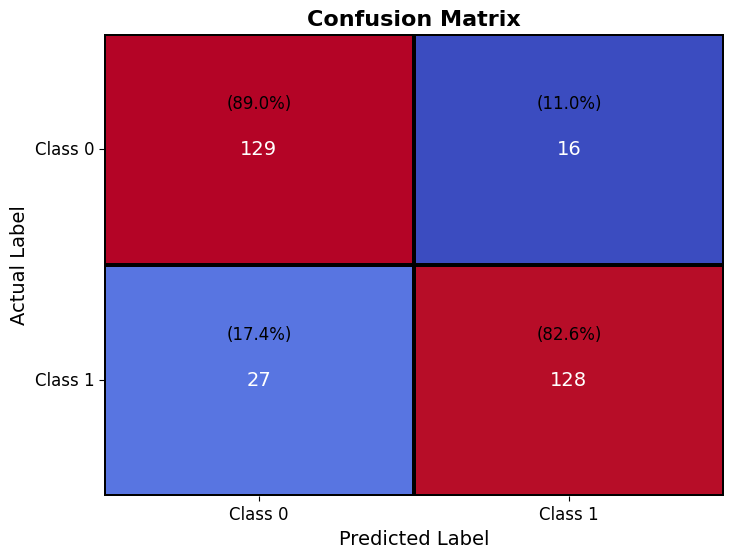

In [12]:
# Create an Enhanced Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False, linewidths=1.5, linecolor='black',
            annot_kws={"size": 14})  # Better readability

# Adding percentage annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j + 0.5, i + 0.3, f"({cm_percentage[i, j]:.1f}%)", ha='center', va='center', color='black', fontsize=12)

# Improve Labels
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('Actual Label', fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=['Class 0', 'Class 1'], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=['Class 0', 'Class 1'], fontsize=12, rotation=0)

# Show the Plot
plt.show()